#Goals

Optimasi campaign result terkait penawaran produk baru sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customer yang menerima penawaran produk baru tersebut

## Cek kualitas Data


1.   Apakah ada feature data yang tidak sesuai?
2.   Adakah duplikat,missing value atau outlier dan bagaimana cara mengatasinya?
3.   Apakah terdapat distribusi data yang tidak sesuai?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

#Question 1
Apakah ada feature data yang tidak sesuai?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#### tipe data income dan dt costumer belum sesuai

In [5]:
for dtype, col in zip(df.dtypes, df.columns):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), (df[col].max()))
  else:
    print(col, dtype)
    print(df[col].unique())


    print()

ID int64
0 11191
Year_Birth int64
1893 1996
Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2
Teenhome int64
0 2
Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/13' '

In [6]:
df.columns = df.columns.str.replace(' ', '')

In [7]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [8]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float')

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Question 2
Adakah duplikat,missing value atau outlier dan bagaimana cara mengatasinya?



##duplicates

In [11]:
df.duplicated().sum()

0

###missing value

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

<Axes: xlabel='Income'>

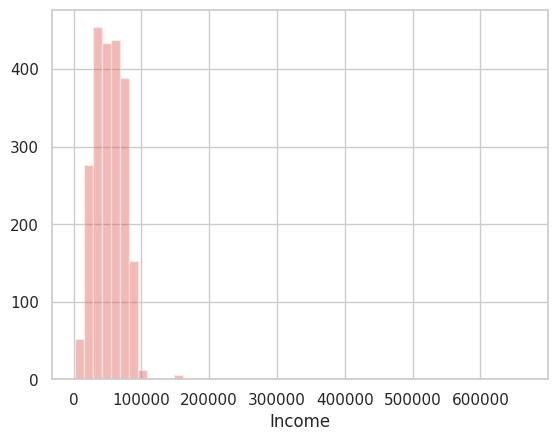

In [13]:
sns.distplot(df['Income'], kde=False, hist=True)

<Axes: >

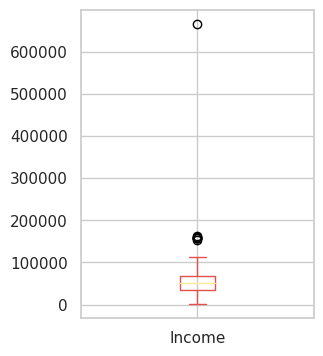

In [14]:
df['Income'].plot(kind='box', figsize=(3,4))

#####median tahan banting terhadap outlier

In [15]:
df['Income'] = df['Income'].fillna(df['Income'].median())

##Outliers

In [16]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
                inplace=True)

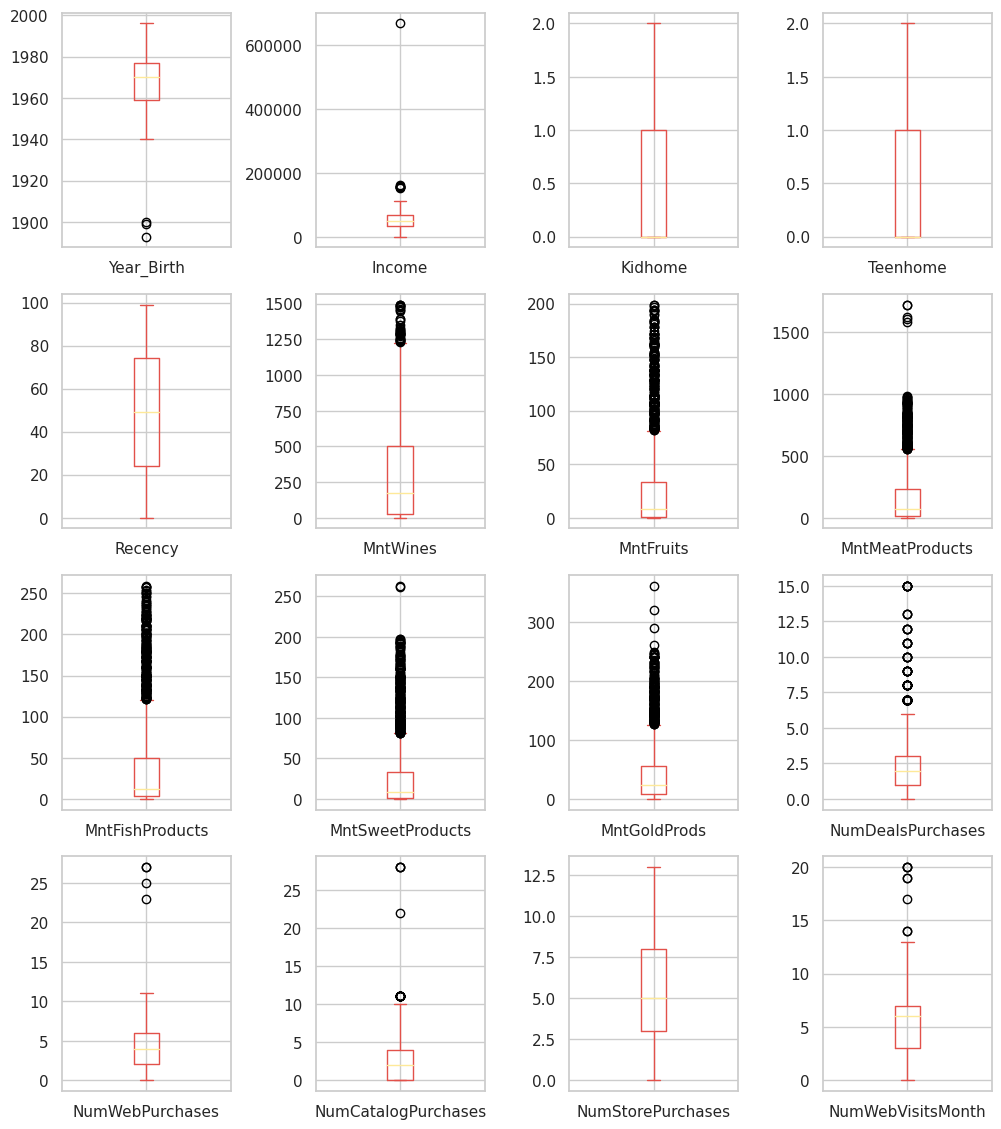

In [18]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

#Question 3
Apakah terdapat distribusi yang tidak masuk akal?


In [19]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

In [20]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

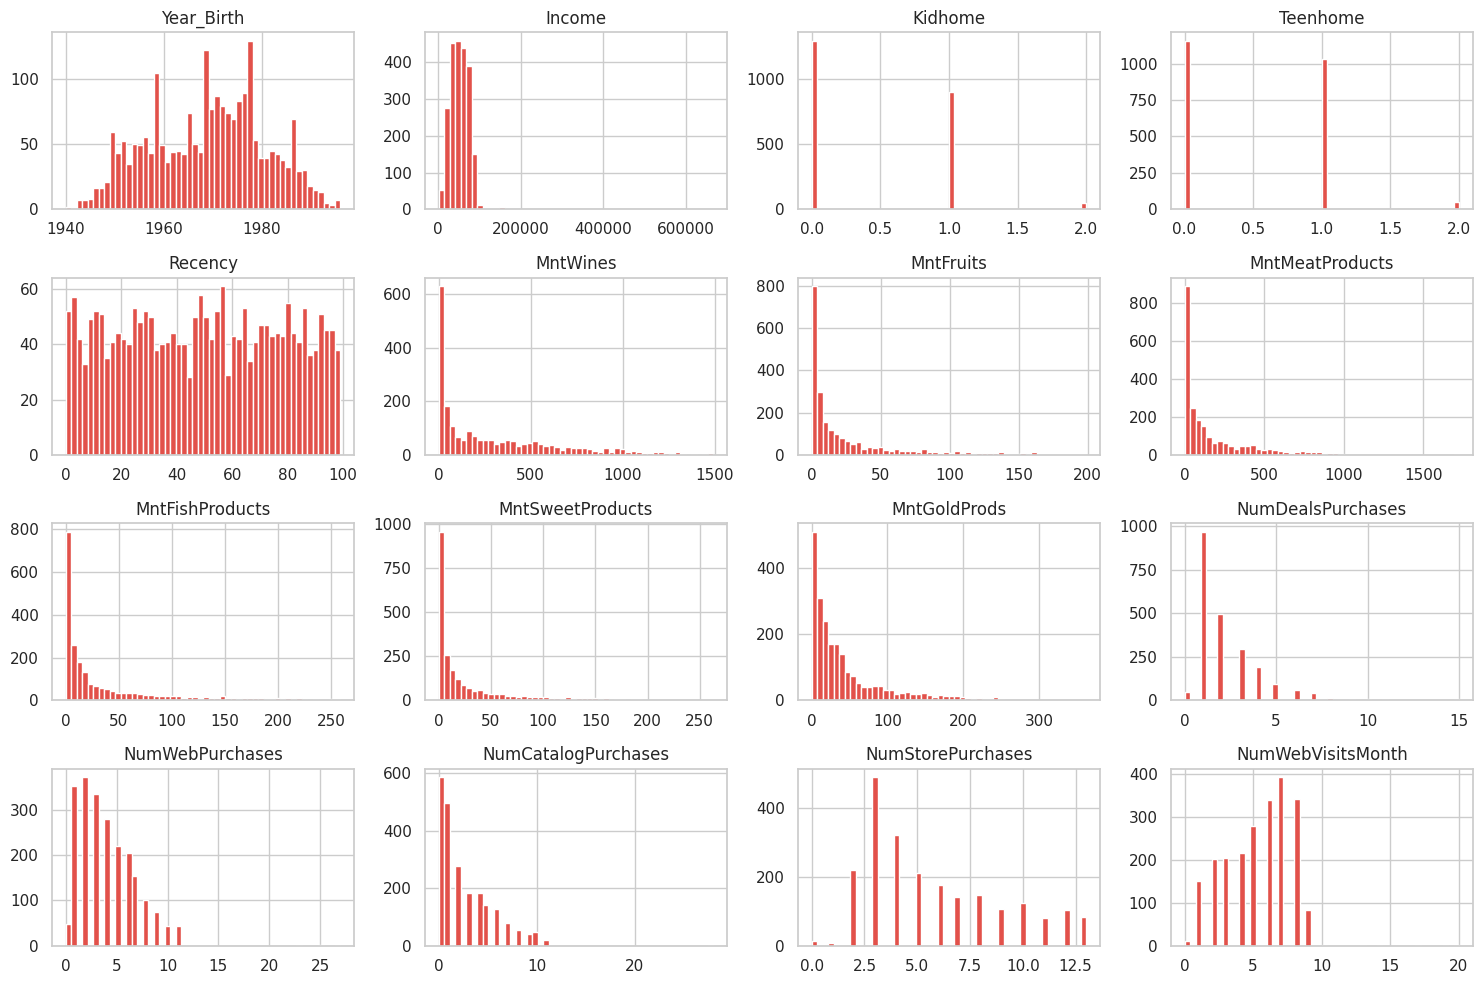

In [21]:
fig=plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

#**Data insight**

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


kita akan membuat kolom baru, yaitu usia didapatkan dari yearbirth dan dt_customer

#Year_birth

In [23]:
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

<Axes: xlabel='Customer_Age', ylabel='Count'>

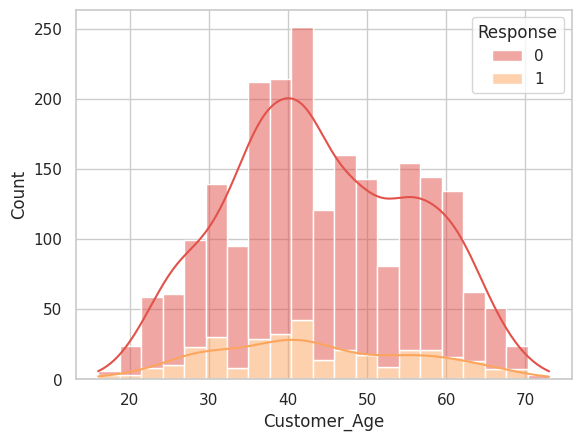

In [24]:
sns.histplot(data=df,x='Customer_Age', hue='Response', multiple='stack', kde=True)

#Education

In [25]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

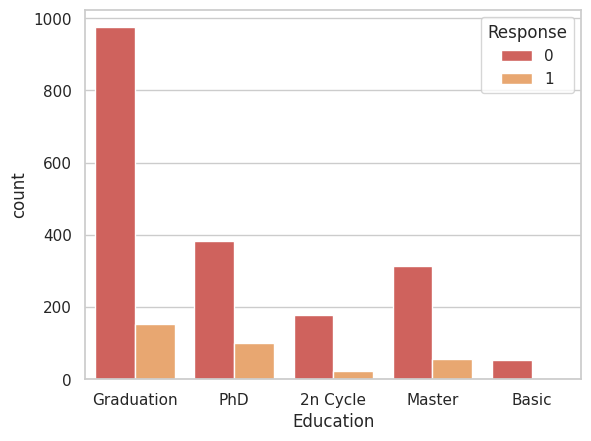

In [26]:
sns.countplot(data=df, x='Education', hue='Response')

In [30]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

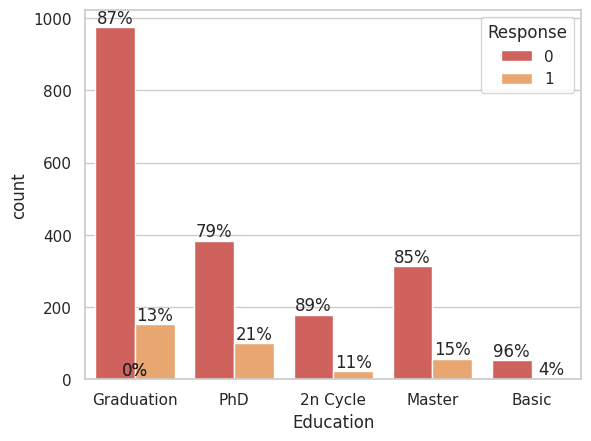

In [31]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

PHD banyak memberikan respon tentang campaign dari perusahaan ini yakni sebanyak 21%

#melihat korelasi income dengan education

(0.0, 175000.0)

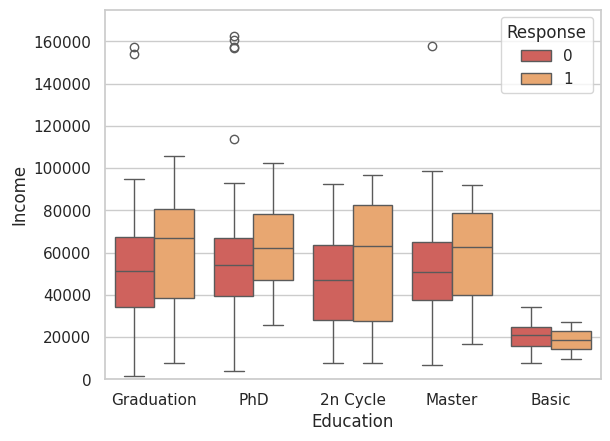

In [32]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0,175000)

income yang lebih tinggi cenderung menerima penawaran campaign

##Marital status

In [33]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [34]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

In [35]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

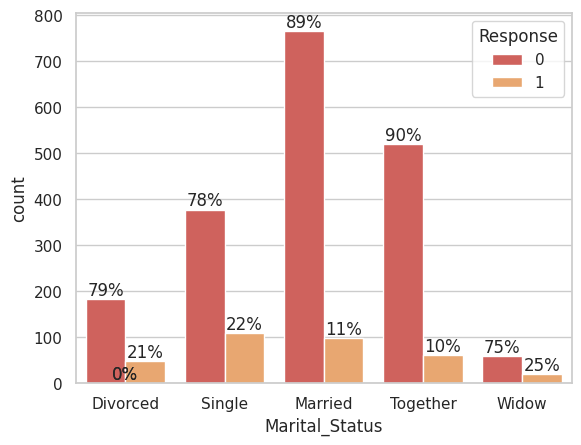

In [36]:
ax = sns.countplot(data=df, x='Marital_Status', hue='Response')
barPerc(df, 'Marital_Status', ax)

jika customer tinggal sendiri cenderung membeli/menerima tawaran campaign

## Kidhome + Teenhome

kita akan membuat kolom num_dependants untuk mengetahui berapa banyak tanggungan

In [37]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

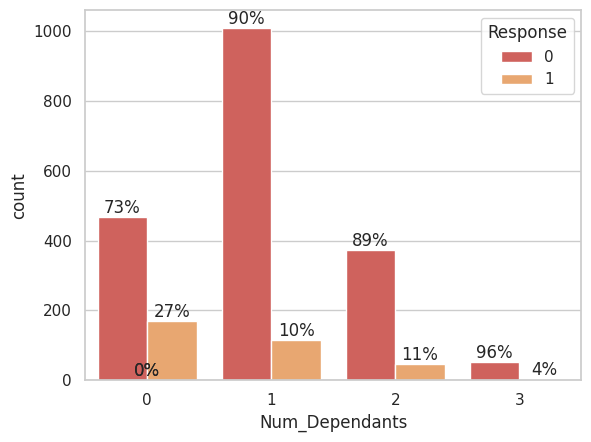

In [38]:
ax = sns.countplot(data=df, x='Num_Dependants', hue='Response')
barPerc(df, 'Num_Dependants', ax)

Customer yang tinggal sendiri cenderung menerima penawaran campaign

##Customer Join Date

In [39]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

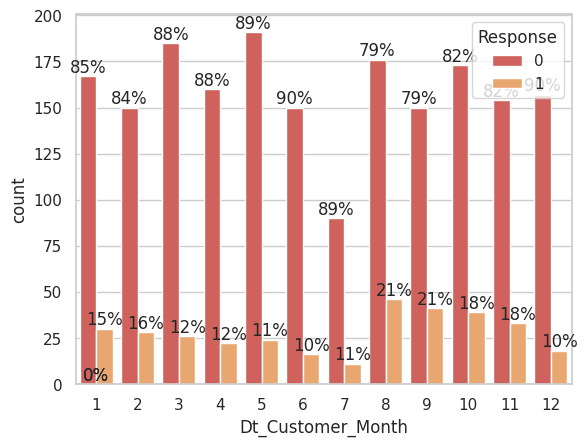

In [40]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

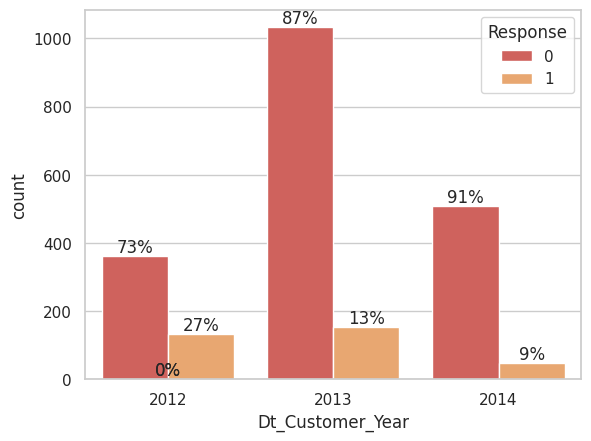

In [41]:
ax= sns.countplot(data=df, x='Dt_Customer_Year', hue='Response')
barPerc(df, 'Dt_Customer_Year', ax)

semakin lama customer join, semakin besar costumer menerima campaign

##Recency

<Axes: xlabel='Recency', ylabel='Count'>

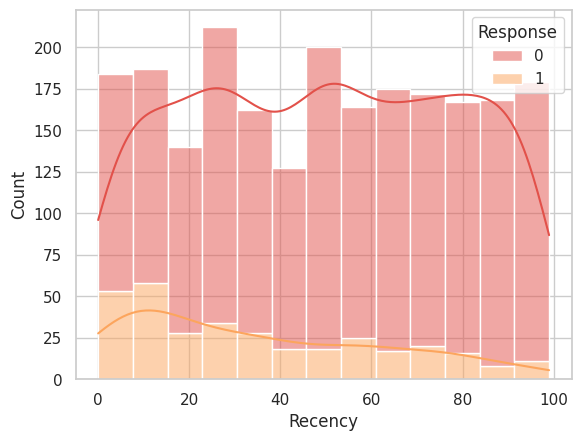

In [42]:
from inspect import stack
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

customer yang belum lama membeli, cenderung menerima campaign

##Amoun Spent

In [43]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

In [44]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


kita akan totalkan semua amt menjadi totalamtspent

In [45]:
amt_spent_features= [ c for c in df.columns if 'Mnt' in str(c)]

In [46]:
df['TotalAmount_Spent']=df[amt_spent_features].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

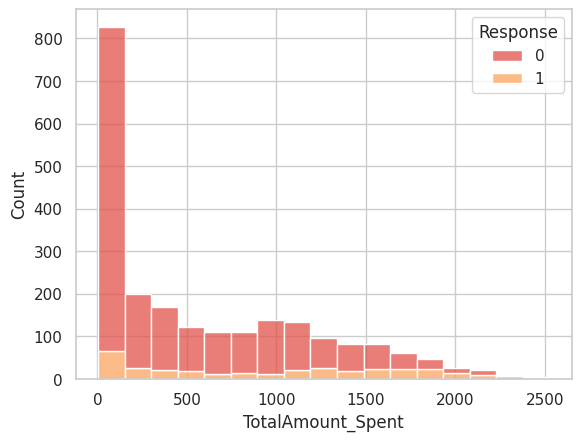

In [48]:
sns.histplot(data=df, x='TotalAmount_Spent', hue='Response', multiple='stack', kde=False)

ketika customer sudah spent uangnya sekitar 100-200 dollar maka customer cenderung menerima campaign

##Purchases

In [49]:
purchases_features = [ c for c in df.columns if 'Purchases' in str(c)]
purchases_features.append('Response')

In [50]:
df[purchases_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [ ]:
df['TotalPurchases'] = df[purchases_features].sum(axis=1)

<Axes: xlabel='TotalPurchases', ylabel='Count'>

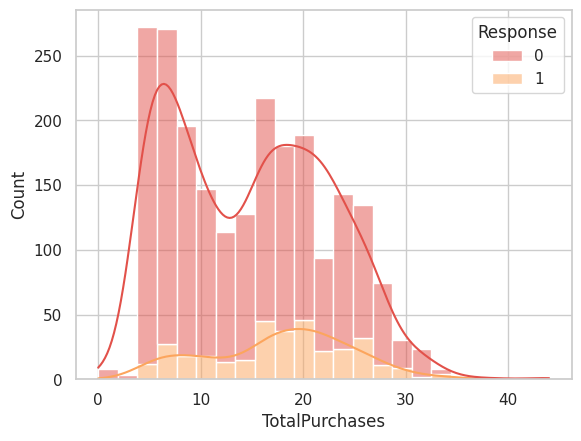

In [52]:
sns.histplot(data=df, x='TotalPurchases', hue='Response', multiple='stack', kde=True)

tidak ada pola unik antara respons 0 dan 1

##Number Web visit month

In [53]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


tidak memiliki korelasi terhadap respon

##Previous Campaign

In [54]:
prev_cmp= [ c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [55]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


##Complain

In [56]:
df[['Complain', 'Response']].corr()[['Response']]

,Response
Complain,0.000185
Response,1.000000


##Country

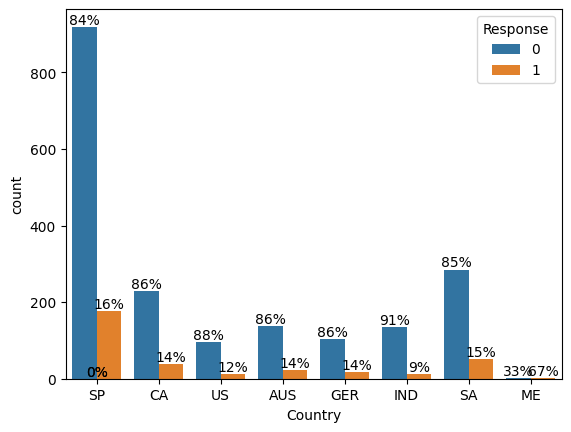

In [52]:
ax = sns.countplot(data=df, x='Country', hue='Response')
barPerc(df, 'Country', ax)

customer yang berasal dari ME atau Meksiko dan SP atau Spain lebih menerima campign

###**Modelling**

 membagi data


1.   Data Train (60%)
2.   Data Validation (untuk menegevaluasi data train) (20%)
3.   Data Test (test kedua kali dari validation) (20%)



In [57]:
df = pd.read_csv('/content/marketing_data.csv')
df.shape

(2240, 28)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df_full_train, df_test= train_test_split(df, test_size=0.2, random_state=1)

In [60]:
df_train, df_valid= train_test_split(df_full_train, test_size=0.25, random_state=1)

In [61]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [62]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

#**Preprocessing**

#Numeric Pre Processing

In [63]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

In [64]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

In [65]:
df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')

In [66]:
df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

In [67]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [68]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [69]:
df_train=df_train[df_train['Year_Birth']>1900].reset_index(drop=True)
df_valid=df_valid[df_valid['Year_Birth']>1900].reset_index(drop=True)
df_test=df_test[df_test['Year_Birth']>1900].reset_index(drop=True)

In [70]:
df_train['Customer_Age'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age'] = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [71]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Yolo', 'Alone', 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Yolo', 'Alone', 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Yolo', 'Alone', 'Absurd'] else str(x))

In [72]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

In [73]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [74]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

In [75]:
purchases_features = [ c for c in df_train.columns if 'Purchases' in str(c)]
df_train['totalPurchases'] = df_train[purchases_features].sum(axis=1)
df_valid['totalPurchases'] = df_valid[purchases_features].sum(axis=1)
df_test['totalPurchases'] = df_test[purchases_features].sum(axis=1)

menampilkan semua data train test dan valid

In [76]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())
print()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


In [77]:
cmp_feat= [c for c in df.columns if 'Acceptedcmp' in str(c)]
mnt_feat= [c for c in df.columns if 'Mnt' in str(c)]
num_feat= [c for c in df.columns if 'Num' in str(c)]

In [81]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year',
                'TotalAmount_Spent', 'totalPurchases']

In [82]:
all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

In [83]:
display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


#Kategori Preprocessing

In [84]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [85]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

In [86]:
all_feat = categoric_feat + numeric_feat

In [87]:
df_train_final = df_train[all_feat]
df_test_final = df_test[all_feat]
df_valid_final = df_valid[all_feat]

### Categori :
- Education (ordinal, ada tingkatan)
- Marital Status (nominal, apakah single atau maried)
-Country (Nominal)

In [88]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

pakai dictionary karena kelasnya lebih dari 3

In [89]:
education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [90]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [91]:
df_train_final.head()

,Education,Marital_Status,Country,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,totalPurchases
0,5,Single,CA,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,22585.0,0,0,23,0,43,0,3,2013,81,5


untuk marital status dan country digunakan metod one hot encoding

In [92]:
from sklearn.feature_extraction import DictVectorizer

In [93]:
dv = DictVectorizer(sparse=False)

In [94]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

In [95]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)

In [96]:
df_train_final_dicts[0:2]

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+01,
        4.0000e+00, 2.0140e+03, 5.0000e+00, 7.1466e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.6000e+01, 0.0000e+00, 1.2300e+03,
        1.9000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 4.2000e+01,
        1.1000e+01, 2.0120e+03, 2.0000e+00, 6.3684e+04, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 6.1000e+01, 1.0000e+00, 1.4640e+03,
        2.3000e+01]])

In [97]:
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

In [99]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

In [100]:
df_train_final.head()

,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,Marital_Status=YOLO,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,totalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,4.0,2014.0,5.0,71466.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86.0,0.0,1230.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,11.0,2012.0,2.0,63684.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61.0,1.0,1464.0,23.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,12.0,2013.0,4.0,38961.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,70.0,6.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0,9.0,2012.0,2.0,76445.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1410.0,21.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,3.0,2013.0,2.0,22585.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0,0.0,81.0,5.0


#**Modelling**

#Base Model



*   X = Independent Variable
*   Y = Dependent Variable atau variabel target



#### 1. kita define dulu variable X, disini X nya all_feature

In [102]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

In [103]:
Y_train_final = df_train.Response
Y_valid_final = df_valid.Response
Y_test_final = df_test.Response

#Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
model = LogisticRegression(random_state=42)

In [112]:
Y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [110]:
print('LogisticRegression Result:', roc_auc_score(Y_valid_final,Y_valid_pred).round(3))

LogisticRegression Result: 0.734


#Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, Y_train_final)

RandomForestClassifier(random_state=42)

In [118]:
Y_valid_pred = model.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(Y_valid_final, Y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.803


#Performance Stability Check

In [120]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([Y_train_final, Y_valid_final])

In [121]:

model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

In [122]:
Y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(Y_test_final, Y_test_pred).round(3))

RandomForest ROCAUC Result: 0.813


##**Interpretation**

kita akan menampilkan shape value untuk menghasilkan model machine learniing

In [123]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00


In [124]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_final)

In [125]:
import matplotlib.pyplot as plot

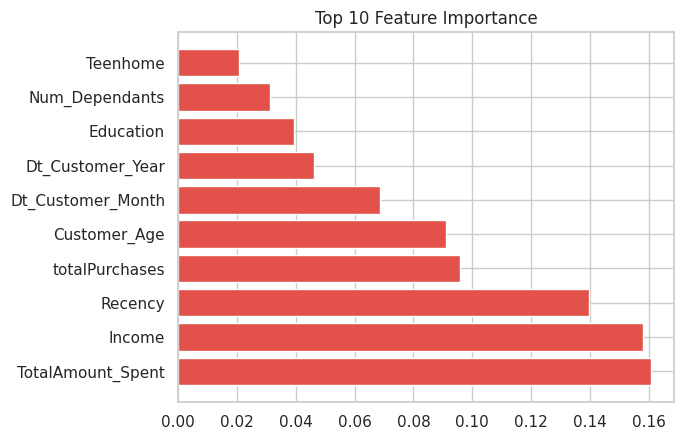

In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_final, Y_train_final)

importances = model.feature_importances_

# Visualisasi
indices = np.argsort(importances)[::-1]
plt.barh(range(10), importances[indices[:10]])
plt.yticks(range(10), X_test_final.columns[indices[:10]])
plt.title("Top 10 Feature Importance")
plt.show()